In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimise

In [2]:
## 3. feladat

raw20_1=np.loadtxt('735Labor_aprilis_7_145Mg_mas.dat')
raw20_2=np.loadtxt('736Labor_aprilis_7_145Mg_mas.dat')
raw2=np.loadtxt('737Labor_aprilis_7_145Mg_2mN_mas.dat')
raw1=np.loadtxt('738Labor_aprilis_7_145Mg_1mN_mas.dat')



In [3]:
max1=230
max2=230
#plt.plot(raw20_1[:max1, 2], raw20_1[:max1, 1])
#plt.plot(raw20_2[:max2, 2], raw20_2[:max2, 1])
#plt.plot(raw2[5:, 2], raw2[5:, 1])
#plt.plot(raw1[:, 2], raw1[:, 1])
#plt.plot(raw20_1[:max1, 2], exp(raw20_1[:max1, 2], *params20_1))
#plt.plot(raw20_2[:max1, 2], exp(raw20_2[:max1, 2], *params20_2))


In [4]:
#def exp(x, A, m, B):
#    return A*x**m+B
def exp(x, A, m):
    return A*x**m

In [5]:
params1, cov1 = optimise.curve_fit(exp, raw1[:, 2], raw1[:, 1])
err1=np.sqrt(np.diag(cov1))

params2, cov2 = optimise.curve_fit(exp, raw2[5:, 2], raw2[5:, 1], p0=params1)
err2=np.sqrt(np.diag(cov2))
params20_1, cov20_1 =  optimise.curve_fit(exp, raw20_1[:max1, 2], raw20_1[:max1, 1], p0=params1)
err20_1=np.sqrt(np.diag(cov20_1))
params20_2, cov20_2 =  optimise.curve_fit(exp, raw20_2[:max2, 2], raw20_2[:max2, 1], p0=params1)
err20_2=np.sqrt(np.diag(cov20_2))


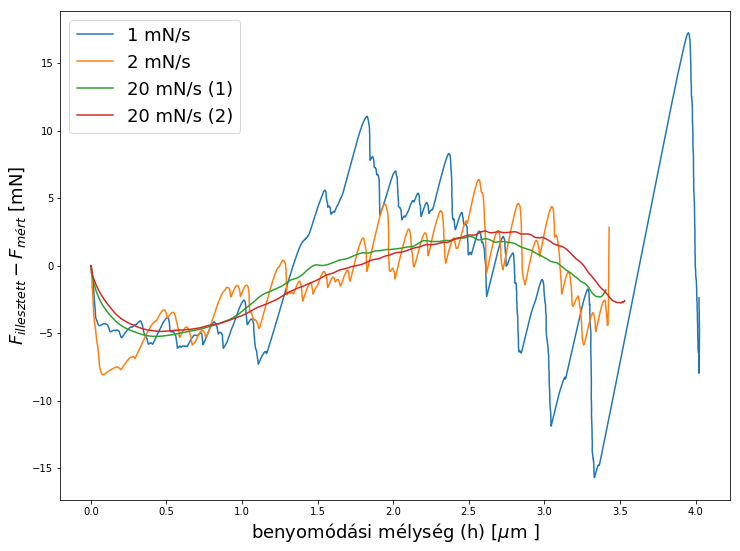

In [6]:
plt.figure(figsize=(12, 9))
plt.plot(raw1[:, 2], exp(raw1[:, 2], *params1)-raw1[:, 1], label='1 mN/s')
plt.plot(raw2[5:, 2], exp(raw2[5:, 2], *params2)-raw2[5:, 1], label='2 mN/s')
plt.xlabel(u'benyomódási mélység (h) [$\mu$m ]',fontsize=18)
plt.ylabel(u'$F_{illesztett}-F_{mért}$ [mN]', fontsize=18)
plt.plot(raw20_1[:max1, 2], exp(raw20_1[:max1, 2], *params20_1)-raw20_1[:max1, 1], label='20 mN/s (1)')
plt.plot(raw20_2[:max1, 2], exp(raw20_2[:max1, 2], *params20_2)-raw20_2[:max1, 1], label='20 mN/s (2)')
#plt.title(u'Al-1.45%Mg minta különböző sebességgel felvett mélység-nyomás grafikonjának illesztettől eltérése')
plt.legend( fontsize=18)
plt.savefig('feladat3.png')

In [7]:
print('Az illesztett görbék ($f(h)=Ah^m$)paraméterei:\n 1 mN/s: $A = ({0:.2f}\pm{1:.2f})~mN/(\mu m)^m$, $m = {2:.3f}\pm{3:.3f}$\n 2 mN/s: $A = ({4:.2f}\pm{5:.2f})~mN/(\mu m)^m$, $m = {6:.3f}\pm{7:.3f}$\n 20 mN/s (1): $A = ({8:.2f}\pm{9:.2f})~mN/(\mu m)^m$, $m = {10:.3f}\pm{11:.3f}$\n 20 mN/s (2): $A = ({12:.2f}\pm{13:.2f})~mN/(\mu m)^m$, $m = {14:.3f}\pm{15:.3f}$\n'.format(params1[0], err1[0], params1[1], err1[1],
                                                                                              params2[0], err2[0], params2[1], err2[1],
                                                                                              params20_1[0], err20_1[0], params20_1[1], err20_1[1],
                                                                                              params20_2[0], err20_2[0], params20_2[1], err20_2[1],))

Az illesztett görbék ($f(h)=Ah^m$)paraméterei:
 1 mN/s: $A = (29.52\pm0.13)~mN/(\mu m)^m$, $m = 1.311\pm0.004$
 2 mN/s: $A = (34.99\pm0.10)~mN/(\mu m)^m$, $m = 1.362\pm0.003$
 20 mN/s (1): $A = (31.64\pm0.21)~mN/(\mu m)^m$, $m = 1.457\pm0.006$
 20 mN/s (2): $A = (28.70\pm0.21)~mN/(\mu m)^m$, $m = 1.489\pm0.007$



In [8]:
##2. feladat

def hatv(x, A, B, k):
    return A*(x**k)+B

In [9]:
HV = np.array([290.238, 452.789, 473.894 , 559.97, 643.526 ,670.051, 944.04, 1266.943])
HV_err = np.array([2.149, 3.343, 3.509, 4.129, 4.77, 4.951, 6.978, 9.357])
c = np.array([0., 0.47, 0.93, 1.25, 1.45, 2.7, 4.5, 7.3])/100

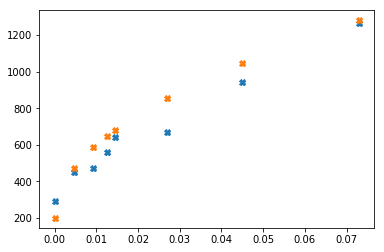

In [10]:
plt.plot(c, HV, 'X')
plt.plot(c, hatv(c, 4000, 200, 0.5), 'X')

In [11]:
param000=np.array([4000, 200, 0.5])
param_f2, cov_f2=optimise.curve_fit(hatv, c, HV, sigma=HV_err, p0=param000)
param_f2, cov_f2=optimise.curve_fit(hatv, c, HV, sigma=HV_err, p0=param_f2)
err_f2=np.sqrt(np.diag(cov_f2))

In [12]:
print('Az illesztett görbe ($HV(c) = HV_0+Bc^m$) paraméterei:\n $HV_0=({0:.2f}\pm{1:.2f})~MPa$,\n $B = ({2:.2f}\pm{3:.2f})MPa$,\n $m = {4:.2f}\pm{5:.2f}$.'.format(param_f2[0], err_f2[0], param_f2[1], err_f2[1], param_f2[2], err_f2[2]))

Az illesztett görbe ($HV(c) = HV_0+Bc^m$) paraméterei:
 $HV_0=(5967.46\pm1631.03)~MPa$,
 $B = (295.00\pm22.76)MPa$,
 $m = 0.72\pm0.08$.


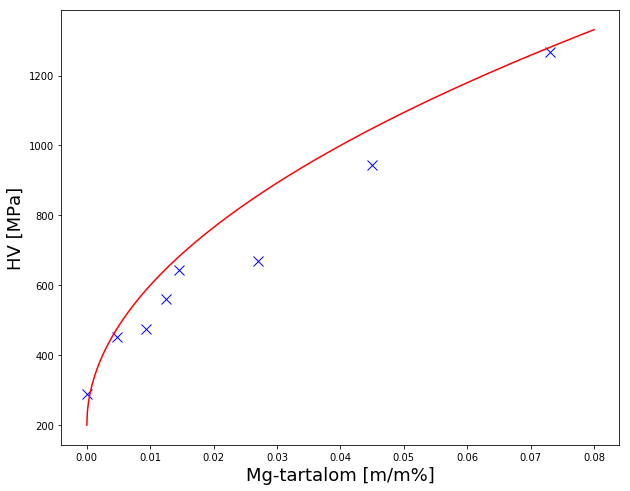

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(c, HV, 'x', ms=10, color="blue")
plt.plot(np.array(np.linspace(0, 0.08, 1000)), hatv(np.array(np.linspace(0, 0.08, 1000)), 4000, 200, 0.5), color='red')
#plt.errorbar(c, HV, yerr=HV_err, capsize=10, linewidth=0)
plt.ylabel('HV [MPa]', fontsize=18)
plt.xlabel(u'Mg-tartalom [m/m%]', fontsize=18)
plt.savefig('HV_illeszt.png')